# Practice Exercise: Exploring data (Exploratory Data Analysis)

## Context:
- The data includes 120 years (1896 to 2016) of Olympic games with information about athletes and medal results.
- We'll focus on practicing the summary statistics and data visualization techniques that we've learned in the course. 
- In general, this dataset is popular to explore how the Olympics have evolved over time, including the participation and performance of different genders, different countries, in various sports and events.

- Check out the original source if you are interested in using this data for other purposes (https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results)

## Dataset Description:

We'll work on the data within athlete_events.csv. 

Each row corresponds to an individual athlete competing in an individual Olympic event.

The columns are:
- **ID**: Unique number for each athlete
- **Name**: Athlete's name
- **Sex**: M or F
- **Age**: Integer
- **Height**: In centimeters
- **Weight**: In kilograms
- **Team**: Team name
- **NOC**: National Olympic Committee 3-letter code
- **Games**: Year and season
- **Year**: Integer
- **Season**: Summer or Winter
- **City**: Host city
- **Sport**: Sport
- **Event**: Event
- **Medal**: Gold, Silver, Bronze, or NA

## Objective: 
   - Examine/clean the dataset
   - Explore distributions of single numerical and categorical features via statistics and plots
   - Explore relationships of multiple features via statistics and plots

We are only going to explore part of the dataset, please feel free to explore more if you are interested.

### 1. Import the libraries `Pandas` and `Seaborn`

In [6]:
import pandas as pd
import seaborn as sns

### 2. Import the data from the csv file as DataFrame `olympics`

In [7]:
olympics = pd.read_csv('athlete_events.csv')

### 3. Look at the info summary, head of the DataFrame

In [8]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


### 4. Impute the missing data

#### Use `IterativeImputer` in `sklearn` to impute based on columns `Year`, `Age`, `Height`, `Weight`

##### Import libraries

In [9]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

##### Build a list of columns that will be used for imputation, which are `Year`, `Age`, `Height`, `Weight`
The column `Year` doesn't have mssing values, but we include it since it might be helpful modeling the other three columns. The age, height, and weight could change across years.

In [10]:
imp_cols = ['Year', 'Age', 'Height', 'Weight']

##### Create an `IterativeImputer` object and set its `min_value` and `max_value` parameters to be the minumum and maximum of corresponding columns

In [11]:
olympics[imp_cols].min()

Year      1896.0
Age         10.0
Height     127.0
Weight      25.0
dtype: float64

In [12]:
olympics[imp_cols].max()

Year      2016.0
Age         97.0
Height     226.0
Weight     214.0
dtype: float64

In [13]:
iter_imp = IterativeImputer(min_value=olympics[imp_cols].min(), max_value=olympics[imp_cols].max())

##### Apply the imputer to fit and transform the columns to an imputed NumPy array

In [14]:
imputed_num = iter_imp.fit_transform(olympics[imp_cols])

##### Assign the imputed array back to the original DataFrame's columns

In [15]:
olympics[imp_cols] = imputed_num

#### Fill the missing values in the column `Medal` with string of 'NA'

In [16]:
cat_cols = ['Medal']

In [17]:
olympics[cat_cols]

,Medal
0,NaN
1,NaN
2,NaN
3,Gold
4,NaN
...,...
271111,NaN
271112,NaN
271113,NaN
271114,NaN


In [18]:
olympics[cat_cols].fillna('NA')

,Medal
0,NA
1,NA
2,NA
3,Gold
4,NA
...,...
271111,NA
271112,NA
271113,NA
271114,NA


In [19]:
olympics[cat_cols]=olympics[cat_cols].fillna('NA')

#### Double check that the columns are all imputed

In [20]:
olympics.isna().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

### 5. Use the `describe` method to check the numerical columns

In [21]:
olympics.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,271116.0,68248.954396,39022.286345,1.0,34643.0,68205.000000,102097.25,135571.0
Age,271116.0,25.600403,6.286884,10.0,22.0,25.000000,28.00,97.0
Height,271116.0,175.280009,9.348504,127.0,170.0,174.985438,180.00,226.0
Weight,271116.0,70.952869,12.804718,25.0,63.0,70.064758,77.00,214.0
Year,271116.0,1978.378480,29.877632,1896.0,1960.0,1988.000000,2002.00,2016.0


### 6. Plot the histograms of the numerical columns using `Pandas`

In [22]:
olympics_numeric=olympics.select_dtypes(include='number')

array([[<Axes: title={'center': 'ID'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'Year'}>, <Axes: >]], dtype=object)

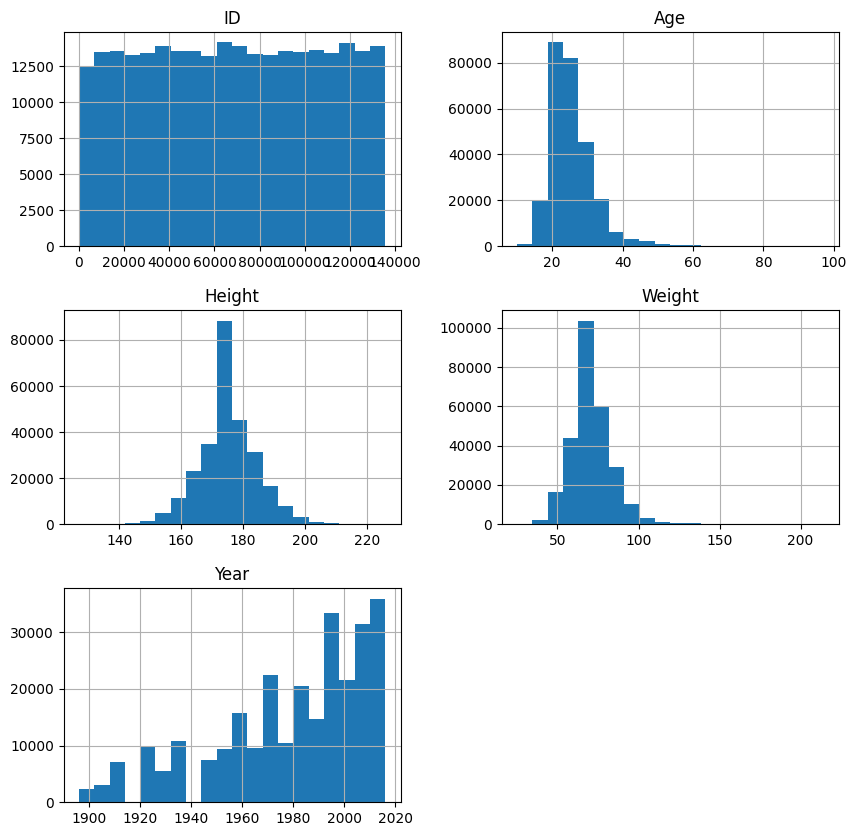

In [23]:
olympics_numeric.hist(bins = 20, figsize=(10,10))

### 7. Plot the histogram with a rug plot of the column `Age` using `Seaborn`, with both 20 and 50 bins

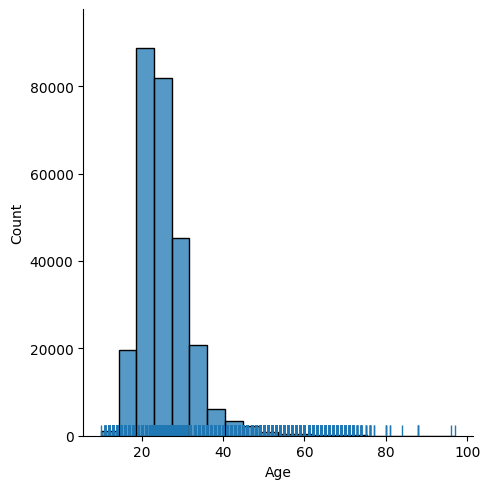

In [24]:
sns.displot(data=olympics, x='Age', rug=True, bins=20)

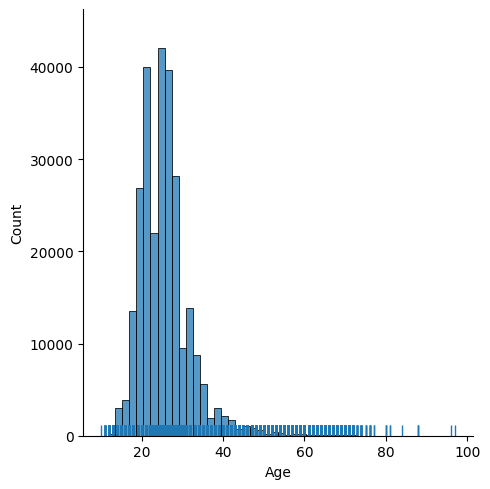

In [25]:
sns.displot(data=olympics, x='Age', rug=True, bins=50)

### 8. Plot the boxplot of the column `Age` using `Pandas`

<Axes: >

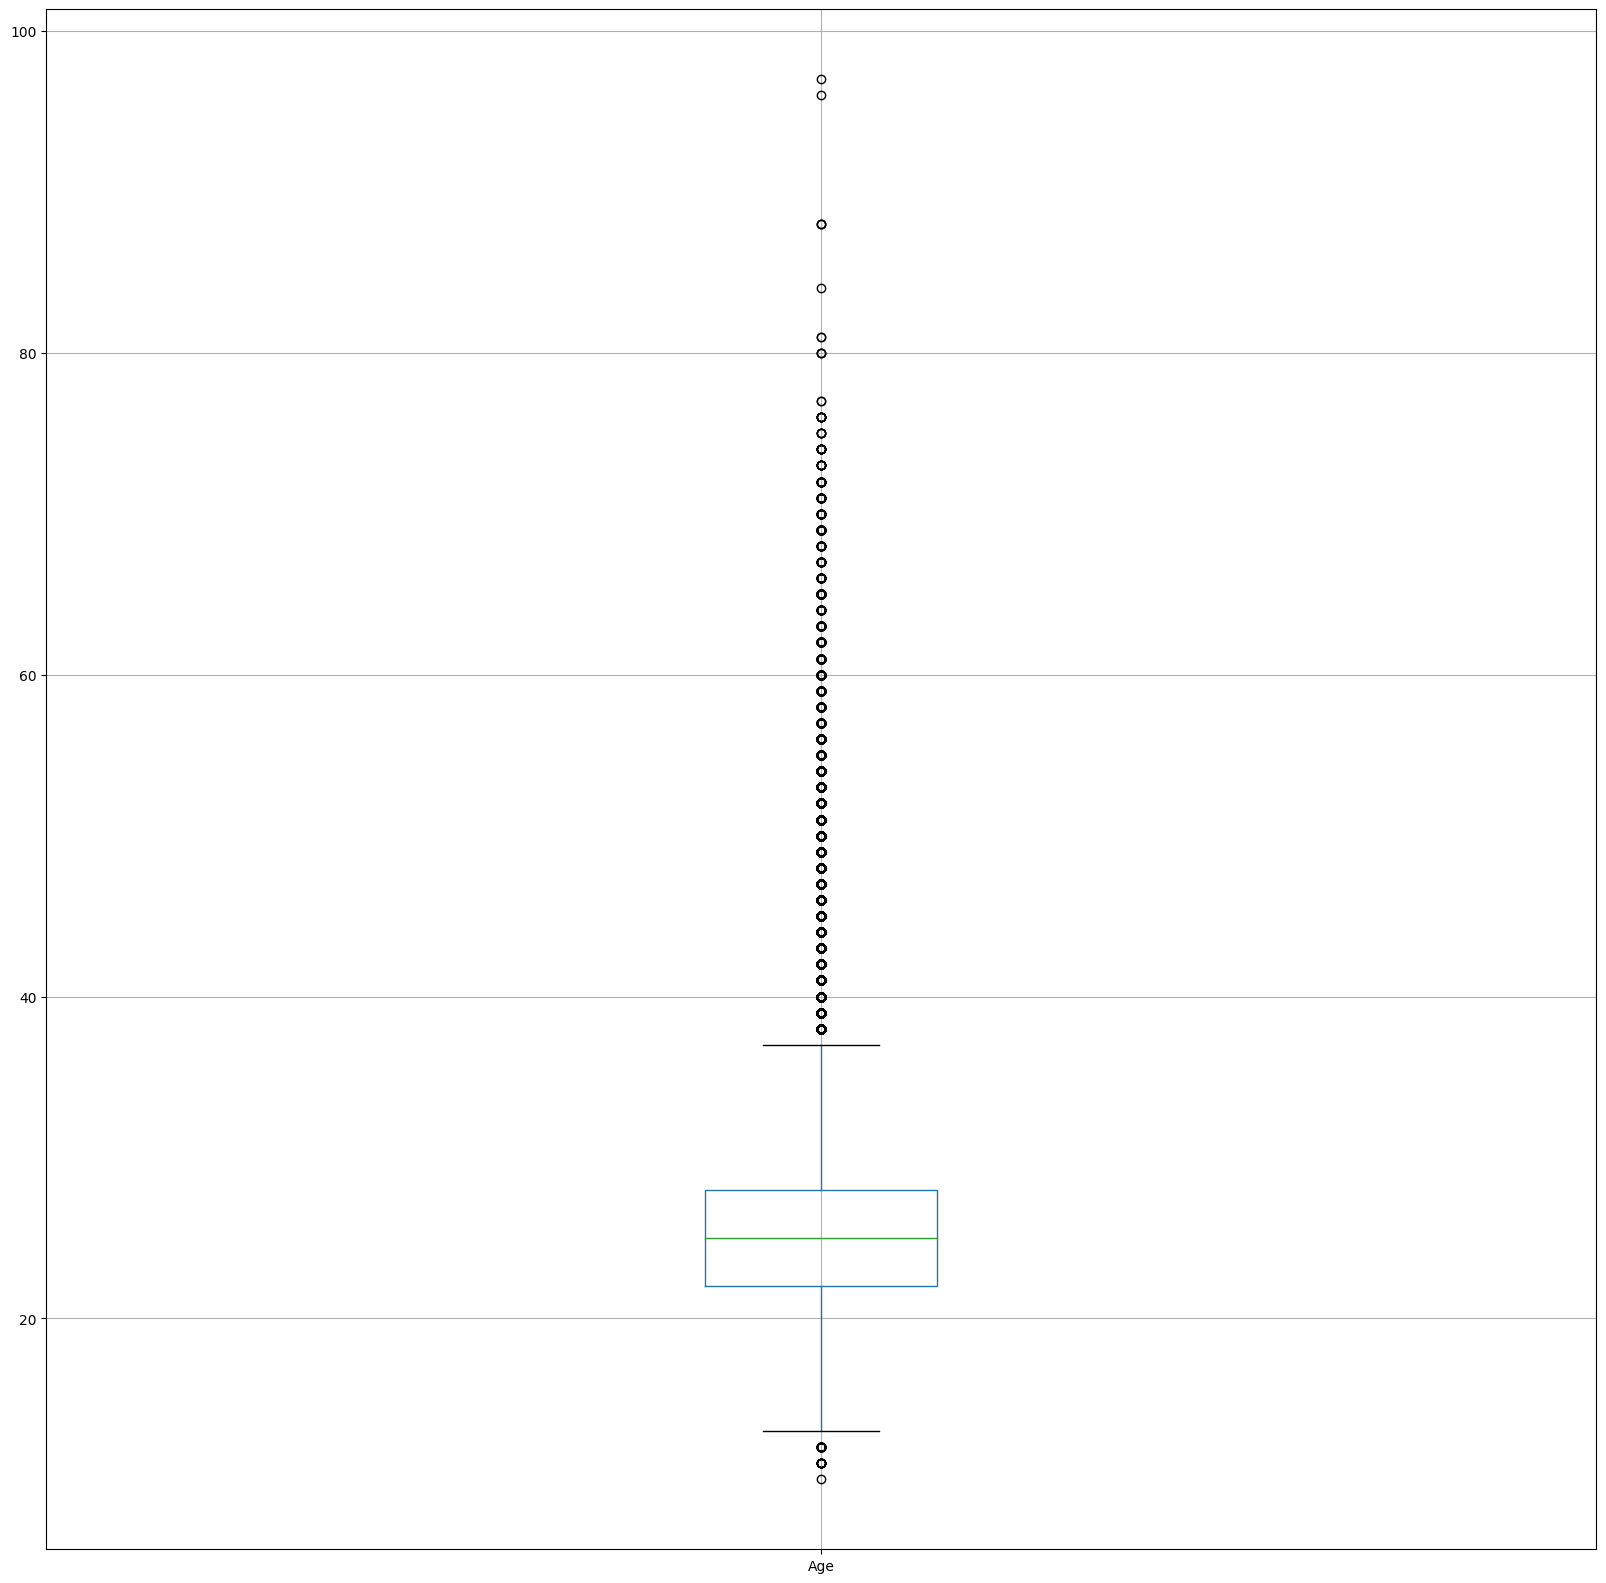

In [26]:
olympics[['Age']].boxplot(figsize=(20,20))

### 9. Plot the boxplot of the column `Age` using `Seaborn`

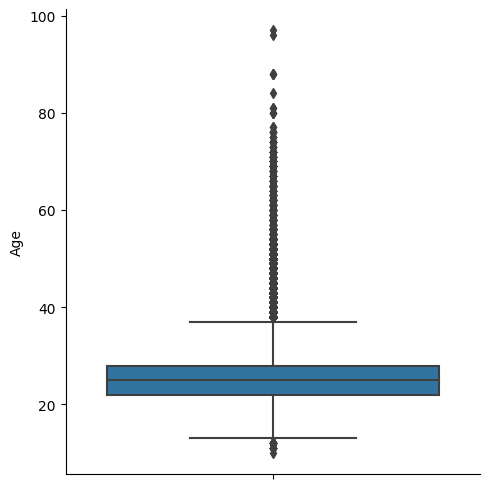

In [27]:
sns.catplot(data=olympics, y='Age', kind='box')

### 10. Calculate the first quartile, third quartile, and IQR of the column `Age`

In [28]:
olympics[['Age']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,271116.0,25.600403,6.286884,10.0,22.0,25.0,28.0,97.0


In [29]:
age_iqr = (28.0)-(22.0)
age_iqr

6.0

### 11. Print out the lower and upper thresholds for outliers based on IQR for the column `Age`

In [30]:
age_high = 28+1.5*(6.0)
age_high

37.0

In [31]:
age_low = 22-1.5*(6.0)
age_low

13.0

### 12. What are the `Sport` for the athletes of really young age

#### Filter for the column `Sport` when the column `Age` has outliers of lower values

In [32]:
fop = (olympics['Age'] < age_low)  
fop

0         False
1         False
2         False
3         False
4         False
          ...  
271111    False
271112    False
271113    False
271114    False
271115    False
Name: Age, Length: 271116, dtype: bool

In [33]:
olympics['fop']=fop

In [34]:
olympics.loc[fop,'Sport']

9648            Swimming
9649            Swimming
9650            Swimming
43468     Figure Skating
46955             Rowing
50291           Swimming
50292           Swimming
50293           Swimming
50294           Swimming
60911     Figure Skating
73461             Rowing
79024         Gymnastics
79352     Figure Skating
84361             Rowing
85840           Swimming
91910           Swimming
91911           Swimming
91912           Swimming
91913           Swimming
93850           Swimming
94058     Figure Skating
96236           Swimming
96665     Figure Skating
97086     Figure Skating
101378    Figure Skating
102916    Figure Skating
108031    Figure Skating
118048    Figure Skating
120233          Swimming
120234          Swimming
126542    Figure Skating
140650    Figure Skating
142882        Gymnastics
145150        Gymnastics
148942        Gymnastics
149033          Swimming
152798    Figure Skating
168941         Athletics
168942         Athletics
192507            Diving


#### Look at the unique values of `Sport` and their counts when `Age` are low-valued outliers

Did you find any sports popular for really young athletes?

In [35]:
olympics[['fop']].value_counts(fop==True)

Age
False    271063
True         53
Name: count, dtype: int64

In [36]:
olympics.loc[olympics['fop']==True,'Sport'].value_counts()

Sport
Swimming          25
Figure Skating    15
Rowing             5
Gymnastics         5
Athletics          2
Diving             1
Name: count, dtype: int64

Swimming and Figure skating

### 13. What are the `Sport` for the athletes of older age

#### Filter for the column `Sport` when the column `Age` has outliers of higher values

In [37]:
yop = (olympics['Age'] > age_high)  
yop

0         False
1         False
2         False
3         False
4         False
          ...  
271111    False
271112    False
271113    False
271114    False
271115    False
Name: Age, Length: 271116, dtype: bool

In [38]:
olympics['yop']=yop

In [39]:
olympics.loc[yop,'Sport']

58        Art Competitions
89                 Sailing
90                 Sailing
124               Shooting
126               Shooting
                ...       
270955    Art Competitions
270970           Athletics
270971           Athletics
270972           Athletics
271090             Sailing
Name: Sport, Length: 11928, dtype: object

#### Look at the unique values of `Sport` and their counts when `Age` are high-valued outliers
Did you find any sports popular for older age athletes?

In [40]:
olympics[['yop']].value_counts(yop==True)

Age
False    259188
True      11928
Name: count, dtype: int64

In [41]:
olympics.loc[olympics['yop']==True,'Sport'].value_counts()

Sport
Shooting                 3178
Art Competitions         2226
Equestrianism            1997
Sailing                  1040
Fencing                  1031
Athletics                 408
Archery                   311
Bobsleigh                 230
Gymnastics                167
Rowing                    122
Cycling                    99
Curling                    98
Table Tennis               83
Cross Country Skiing       81
Biathlon                   78
Canoeing                   71
Tennis                     70
Ice Hockey                 51
Wrestling                  46
Golf                       42
Weightlifting              42
Speed Skating              36
Polo                       33
Figure Skating             30
Handball                   29
Hockey                     29
Water Polo                 29
Luge                       26
Alpine Skiing              25
Skeleton                   23
Beach Volleyball           16
Volleyball                 15
Tug-Of-War                 15
Judo

Shooting, art competitions

### 14. Check for the number of unique values in each column

In [42]:
olympics.nunique()

ID        135571
Name      134732
Sex            2
Age          785
Height      2475
Weight      3565
Team        1184
NOC          230
Games         51
Year          35
Season         2
City          42
Sport         66
Event        765
Medal          4
fop            2
yop            2
dtype: int64

### 15. Use the `describe` method to check the non-numerical columns

In [43]:
cat_cols = olympics.select_dtypes(exclude='number').columns

In [44]:
olympics[cat_cols]

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal,fop,yop
0,A Dijiang,M,China,CHN,1992 Summer,Summer,Barcelona,Basketball,Basketball Men's Basketball,NA,False,False
1,A Lamusi,M,China,CHN,2012 Summer,Summer,London,Judo,Judo Men's Extra-Lightweight,NA,False,False
2,Gunnar Nielsen Aaby,M,Denmark,DEN,1920 Summer,Summer,Antwerpen,Football,Football Men's Football,NA,False,False
3,Edgar Lindenau Aabye,M,Denmark/Sweden,DEN,1900 Summer,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,False,False
4,Christine Jacoba Aaftink,F,Netherlands,NED,1988 Winter,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NA,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
271111,Andrzej ya,M,Poland-1,POL,1976 Winter,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NA,False,False
271112,Piotr ya,M,Poland,POL,2014 Winter,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NA,False,False
271113,Piotr ya,M,Poland,POL,2014 Winter,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NA,False,False
271114,Tomasz Ireneusz ya,M,Poland,POL,1998 Winter,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NA,False,False


In [45]:
olympics[cat_cols].describe()

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal,fop,yop
count,271116,271116,271116,271116,271116,271116,271116,271116,271116,271116,271116,271116
unique,134732,2,1184,230,51,2,42,66,765,4,2,2
top,Robert Tait McKenzie,M,United States,USA,2000 Summer,Summer,London,Athletics,Football Men's Football,NA,False,False
freq,58,196594,17847,18853,13821,222552,22426,38624,5733,231333,271063,259188


### 16. Apply the `value_counts` method for each non-numerical column, check for their unique values and counts

In [46]:
olympics[cat_cols]

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal,fop,yop
0,A Dijiang,M,China,CHN,1992 Summer,Summer,Barcelona,Basketball,Basketball Men's Basketball,NA,False,False
1,A Lamusi,M,China,CHN,2012 Summer,Summer,London,Judo,Judo Men's Extra-Lightweight,NA,False,False
2,Gunnar Nielsen Aaby,M,Denmark,DEN,1920 Summer,Summer,Antwerpen,Football,Football Men's Football,NA,False,False
3,Edgar Lindenau Aabye,M,Denmark/Sweden,DEN,1900 Summer,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,False,False
4,Christine Jacoba Aaftink,F,Netherlands,NED,1988 Winter,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NA,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
271111,Andrzej ya,M,Poland-1,POL,1976 Winter,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NA,False,False
271112,Piotr ya,M,Poland,POL,2014 Winter,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NA,False,False
271113,Piotr ya,M,Poland,POL,2014 Winter,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NA,False,False
271114,Tomasz Ireneusz ya,M,Poland,POL,1998 Winter,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NA,False,False


In [47]:
for col in cat_cols:
    print(olympics[col].value_counts())
    print()

Name
Robert Tait McKenzie          58
Heikki Ilmari Savolainen      39
Joseph "Josy" Stoffel         38
Ioannis Theofilakis           36
Takashi Ono                   33
                              ..
Victor Andrew "Vic" Zwolak     1
Ann Kristin Aarnes             1
Karl Jan Aas                   1
Rolf Aas                       1
Thomas Valentin Aas            1
Name: count, Length: 134732, dtype: int64

Sex
M    196594
F     74522
Name: count, dtype: int64

Team
United States         17847
France                11988
Great Britain         11404
Italy                 10260
Germany                9326
                      ...  
Demi-Mondaine-15          1
Demi-Mondaine-17          1
Notavel                   1
Galopin De La Font        1
Pop Art                   1
Name: count, Length: 1184, dtype: int64

NOC
USA    18853
FRA    12758
GBR    12256
ITA    10715
GER     9830
       ...  
YMD        5
SSD        3
NBO        2
UNK        2
NFL        1
Name: count, Length: 230, dtype: 

### 17. Check the first record within the dataset for each Olympic `Sport`

*Hint: sort the DataFrame by `Year`, then groupby by `Sport`*

In [48]:
olympics.sort_values('Year').groupby(by='Sport').first()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Event,Medal,fop,yop
Sport,,,,,,,,,,,,,,,,
Aeronautics,107506,Hermann Schreiber,M,26.000000,174.589865,71.098729,Switzerland,SUI,1936 Summer,1936.0,Summer,Berlin,Aeronautics Mixed Aeronautics,Gold,False,False
Alpine Skiing,129194,Raoul Weckbecker,M,37.000000,177.217573,76.885761,Luxembourg,LUX,1936 Winter,1936.0,Winter,Garmisch-Partenkirchen,Alpine Skiing Men's Combined,NA,False,False
Alpinism,35388,George Ingle Finch,M,35.000000,176.517364,75.815357,Australia,AUS,1924 Winter,1924.0,Winter,Chamonix,Alpinism Mixed Alpinism,Gold,False,False
Archery,82573,Eugne Mougin,M,47.000000,178.939066,82.092048,France,FRA,1900 Summer,1900.0,Summer,Paris,"Archery Men's Au Chapelet, 50 metres",Gold,False,True
Art Competitions,81394,Eugne-douard Monod,M,40.000000,177.489332,78.427609,Switzerland,SUI,1912 Summer,1912.0,Summer,Stockholm,Art Competitions Mixed Architecture,Gold,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tug-Of-War,112720,Gustaf Fredrik Sderstrm,M,34.000000,175.833593,75.252830,Denmark/Sweden,SWE,1900 Summer,1900.0,Summer,Paris,Tug-Of-War Men's Tug-Of-War,Gold,False,False
Volleyball,116787,"Ernest Emil ""Ernie"" Suwara, Jr.",M,19.000000,189.000000,84.000000,United States,USA,1964 Summer,1964.0,Summer,Tokyo,Volleyball Men's Volleyball,NA,False,False
Water Polo,34311,Favier,M,27.618563,174.310796,71.897322,Pupilles de Neptune de Lille #1-3,FRA,1900 Summer,1900.0,Summer,Paris,Water Polo Men's Water Polo,NA,False,False


### 18. What are the average `Age`, `Height`, `Weight` of female versus male Olympic athletes

In [49]:
olympics[['Age','Height','Weight','Sex']].groupby('Sex').mean()

,Age,Height,Weight
Sex,,,
F,23.748234,168.476034,60.960650
M,26.302496,177.859161,74.740574


### 19. What are the minimum, average, maximum `Age`, `Height`, `Weight` of athletes in different `Year`

In [50]:
olympics.groupby('Year')[['Age','Height','Weight','Year']].agg(['min', 'mean', 'max'])

Age                  Height                             Weight  \
         min       mean   max    min        mean         max        min   
Year                                                                      
1896.0  10.0  25.364356  40.0  154.0  173.569607  188.000000  45.000000   
1900.0  13.0  28.454101  71.0  153.0  174.664627  191.000000  51.000000   
1904.0  14.0  26.867754  71.0  155.0  174.435046  195.000000  43.000000   
1906.0  13.0  27.272610  54.0  165.0  174.946975  196.000000  52.000000   
1908.0  14.0  27.061116  61.0  157.0  175.059627  201.000000  51.000000   
1912.0  13.0  27.528582  67.0  157.0  175.149494  200.000000  49.000000   
1920.0  13.0  28.861062  72.0  142.0  175.220153  218.770915  33.074491   
1924.0  11.0  28.101622  81.0  142.0  174.980222  218.578230  34.356723   
1928.0  11.0  28.728275  97.0  147.0  175.282553  211.000000  41.000000   
1932.0  11.0  32.002855  96.0  147.0  175.826347  200.000000  40.090648   
1936.0  11.0  27.506104  74.0  147.0  175.155241  205.000000  37.000000   
1948.0  12.0  28.407495  84.0  140.0  175.567741  213.000000  47.000000   
1952.0  12.0  26.165217  65.0  150.0  174.812820  213.000000  42.000000   
1956.0  12.0  25.949715  67.0  137.0  174.607226  218.000000  28.000000   
1960.0  11.0  25.187182  65.0  137.0  173.316035  218.000000  36.000000   
1964.0  12.0  24.948374  60.0  137.0  173.546073  218.000000  38.000000   
1968.0  11.0  24.263374  68.0  127.0  173.959439  216.000000  34.000000   
1972.0  12.0  24.318900  69.0  130.0  174.562405  223.000000  38.000000   
1976.0  12.0  23.850452  70.0  136.0  174.865117  220.000000  30.000000   
1980.0  13.0  23.734613  70.0  131.0  175.508742  220.000000  25.000000   
1984.0  12.0  23.925675  60.0  132.0  175.524970  218.000000  31.000000   
1988.0  11.0  24.085104  70.0  127.0  175.698459  223.000000  32.000000   
1992.0  11.0  24.319680  62.0  136.0  175.959574  226.000000  30.000000   
1994.0  13.0  24.422594  46.0  148.0  175.158296  200.000000  40.000000   
1996.0  12.0  24.915179  63.0  136.0  175.836214  223.000000  30.000000   
1998.0  14.0  25.163160  50.0  142.0  174.589636  200.000000  32.000000   
2000.0  13.0  25.422476  63.0  136.0  176.085713  226.000000  28.000000   
2002.0  15.0  25.916281  48.0  149.0  174.709888  201.000000  42.000000   
2004.0  13.0  25.639515  57.0  139.0  175.971393  226.000000  30.000000   
2006.0  14.0  25.959151  52.0  147.0  174.628393  206.000000  38.000000   
2008.0  12.0  25.733541  67.0  137.0  176.209780  226.000000  28.000000   
2010.0  15.0  26.124262  51.0  149.0  174.918873  206.000000  38.000000   
2012.0  13.0  25.961378  71.0  140.0  176.247158  221.000000  30.071474   
2014.0  15.0  25.987324  55.0  146.0  174.818773  206.000000  38.066881   
2016.0  13.0  26.207919  62.0  133.0  176.024469  218.000000  30.000000   

                            Year                  
             mean    max     min    mean     max  
Year                                              
1896.0  70.982411  106.0  1896.0  1896.0  1896.0  
1900.0  72.502816  102.0  1900.0  1900.0  1900.0  
1904.0  71.715326  115.0  1904.0  1904.0  1904.0  
1906.0  72.309427  114.0  1906.0  1906.0  1906.0  
1908.0  72.484058  115.0  1908.0  1908.0  1908.0  
1912.0  72.354296  125.0  1912.0  1912.0  1912.0  
1920.0  72.791440  146.0  1920.0  1920.0  1920.0  
1924.0  72.217506  146.0  1924.0  1924.0  1924.0  
1928.0  72.568654  125.0  1928.0  1928.0  1928.0  
1932.0  73.867313  110.0  1932.0  1932.0  1932.0  
1936.0  71.960859  138.0  1936.0  1936.0  1936.0  
1948.0  72.408041  125.0  1948.0  1948.0  1948.0  
1952.0  71.097510  145.0  1952.0  1952.0  1952.0  
1956.0  71.041599  141.0  1956.0  1956.0  1956.0  
1960.0  69.480564  141.0  1960.0  1960.0  1960.0  
1964.0  69.759825  163.0  1964.0  1964.0  1964.0  
1968.0  69.609517  163.0  1968.0  1968.0  1968.0  
1972.0  70.003339  182.0  1972.0  1972.0  1972.0  
1976.0  70.000335  163.0  1976.0  1976.0  1976.0  
1980.0  70.624903  190.0  1980.0  19

In [51]:
olympics[['Age','Height','Weight','Year']].groupby('Year').mean()

,Age,Height,Weight
Year,,,
1896.0,25.364356,173.569607,70.982411
1900.0,28.454101,174.664627,72.502816
1904.0,26.867754,174.435046,71.715326
1906.0,27.272610,174.946975,72.309427
1908.0,27.061116,175.059627,72.484058
1912.0,27.528582,175.149494,72.354296
1920.0,28.861062,175.220153,72.791440
1924.0,28.101622,174.980222,72.217506
1928.0,28.728275,175.282553,72.568654


In [52]:
olympics[['Age','Height','Weight','Year']].groupby('Year').max()

,Age,Height,Weight
Year,,,
1896.0,40.0,188.000000,106.0
1900.0,71.0,191.000000,102.0
1904.0,71.0,195.000000,115.0
1906.0,54.0,196.000000,114.0
1908.0,61.0,201.000000,115.0
1912.0,67.0,200.000000,125.0
1920.0,72.0,218.770915,146.0
1924.0,81.0,218.578230,146.0
1928.0,97.0,211.000000,125.0


### 20. What are the minimum, average, median, maximum `Age` of athletes for different `Season` and `Sex` combinations

In [53]:
olympics.groupby(['Season','Sex'])['Age'].agg(['min', 'mean', 'median', 'max'])

min       mean  median   max
Season Sex                               
Summer F    11.0  23.680377    23.0  74.0
       M    10.0  26.464649    25.0  97.0
Winter F    11.0  24.015736    24.0  48.0
       M    12.0  25.512635    25.0  58.0

### 21. What are the average `Age` of athletes, and numbers of unique `Team`, `Sport`, `Event`, for different `Season` and `Sex` combinations

In [54]:
olympics.groupby(['Season','Sex'])[['Team', 'Sport', 'Event', 'Age']].agg({'Team': 'nunique', 'Sport': 'nunique', 'Event': 'nunique', 'Age':'mean'})

Team  Sport  Event        Age
Season Sex                               
Summer F     352     40    214  23.680377
       M    1118     49    491  26.464649
Winter F     144     14     57  24.015736
       M     214     17     67  25.512635

### 22. What are the average `Age`, `Height`, `Weight` of athletes, for different `Medal`, `Season`, `Sex` combinations

In [55]:
olympics.groupby(['Season','Sex','Medal'])[['Age','Height','Weight']].mean()

Age      Height     Weight
Season Sex Medal                                   
Summer F   Bronze  24.637527  171.110734  63.903325
           Gold    24.215093  171.594933  64.252235
           NA      23.547521  168.283937  60.468257
           Silver  24.296089  171.310947  63.903671
       M   Bronze  26.382673  179.283138  76.834194
           Gold    26.501307  179.803255  77.426878
           NA      26.454123  177.557129  74.215742
           Silver  26.690500  179.391244  77.017761
Winter F   Bronze  25.115578  167.339043  61.132946
           Gold    25.202636  167.563734  62.006768
           NA      23.855915  167.281733  60.539905
           Silver  25.240527  167.916040  61.921625
       M   Bronze  26.387043  178.831087  77.296962
           Gold    26.606436  179.569202  78.047604
           NA      25.386328  177.741840  74.861337
           Silver  26.430566  179.030573  77.429293

### 23. Plot the scatterplot of `Height` and `Weight`

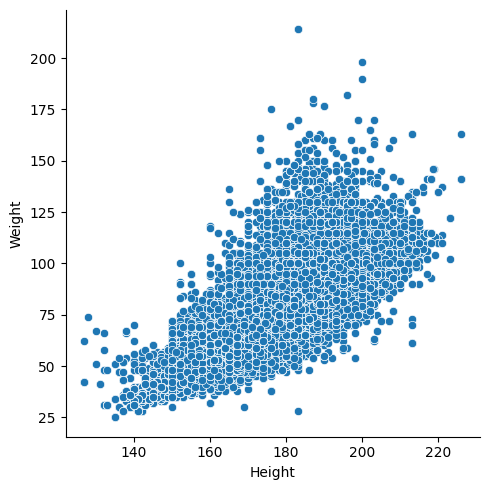

In [56]:
sns.relplot(data=olympics, x='Height', y='Weight', kind='scatter')

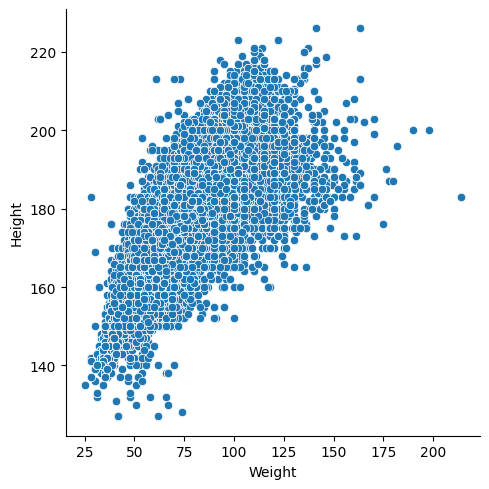

In [57]:
sns.relplot(data=olympics, x='Weight', y='Height', kind='scatter')

### 24. Plot the scatterplot of `Height` and `Weight`, using different colors and styles of dots for different `Sex`

In [58]:
blue, orange, red, green, yellow, pink, cyan=sns.color_palette()[:7]

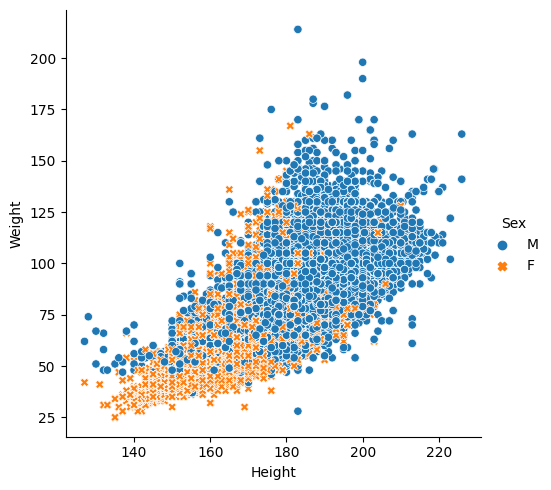

In [59]:
sns.relplot(data=olympics, x='Height', y='Weight', kind='scatter', style='Sex', hue='Sex' )

### 25. Plot the pairwise relationships of `Age`, `Height`, `Weight`

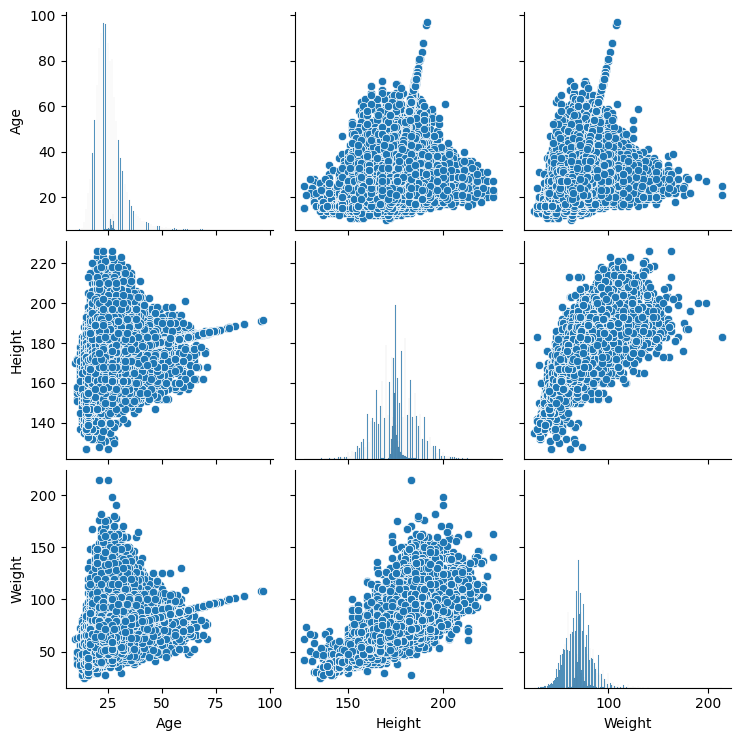

In [60]:
sns.pairplot(data=olympics[['Age', 'Height', 'Weight']])

### 26. Plot the pairwise relationships of `Age`, `Height`, `Weight`, with different colors for `Sex`

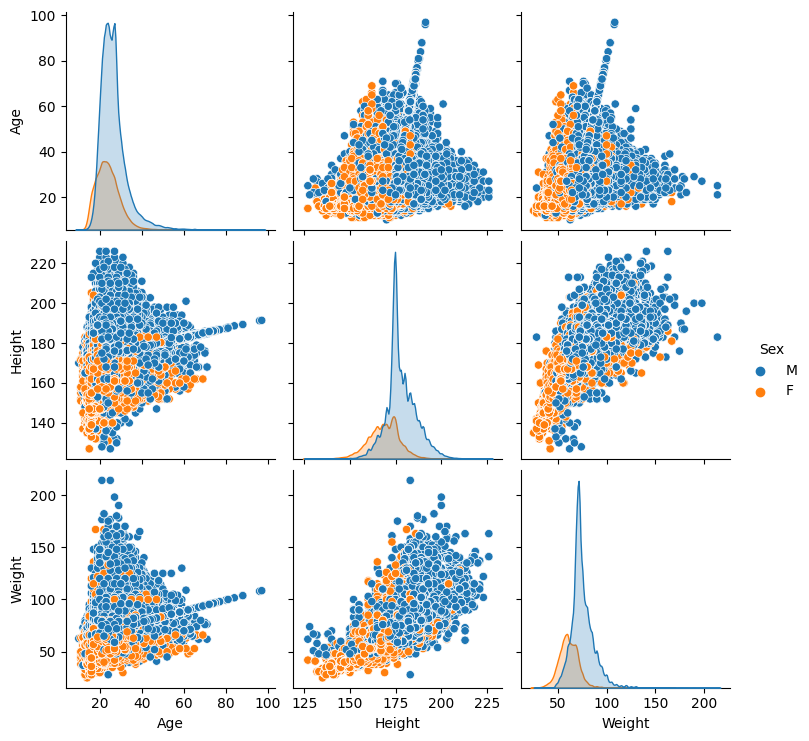

In [61]:
sns.pairplot(data=olympics[['Age', 'Height', 'Weight', 'Sex']], hue='Sex')

### 27. Print out the correlation matrix of `Age`, `Height`, `Weight`

In [62]:
olympics[['Age', 'Height', 'Weight']].corr(numeric_only = True)

,Age,Height,Weight
Age,1.000000,0.161797,0.264409
Height,0.161797,1.000000,0.799258
Weight,0.264409,0.799258,1.000000


### 28. Use heatmap to demonstrate the correlation matrix of `Age`, `Height`, `Weight`, use a colormap (`cmap`) of 'crest'

<Axes: >

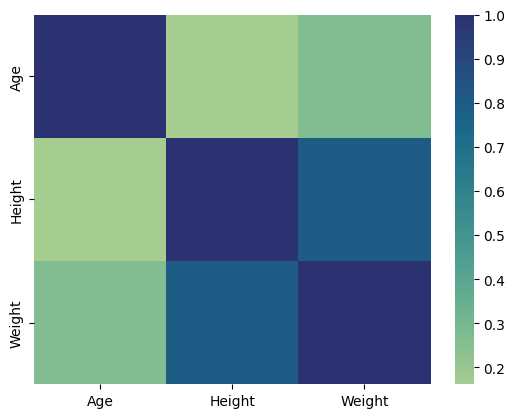

In [63]:
sns.heatmap(data=olympics[['Age', 'Height', 'Weight']].corr(numeric_only = True), cmap='crest')

### 29. Plot the histograms of `Age`, with different colors for different `Sex`

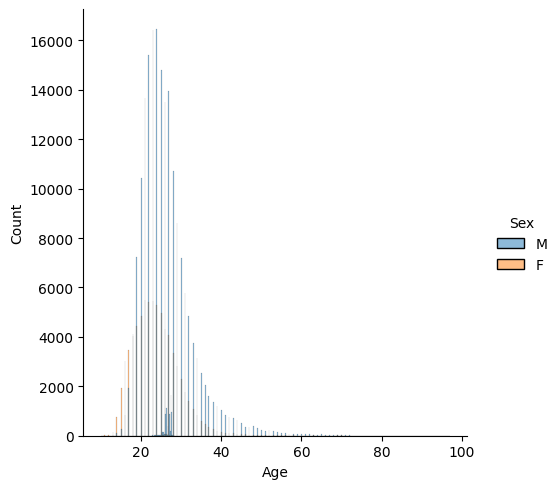

In [64]:
sns.displot(data=olympics, x='Age', hue='Sex')

### 30. Plot the histograms of `Age`, on separate plots for different `Sex`

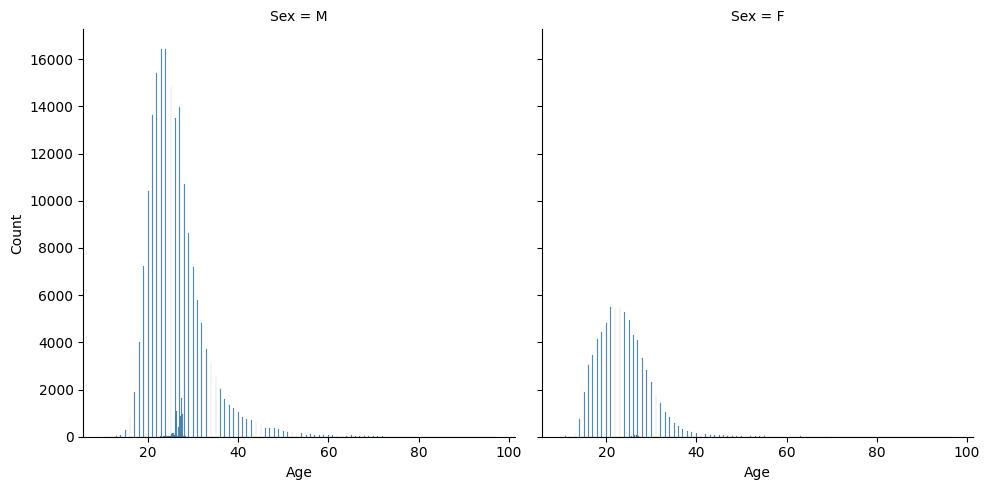

In [65]:
sns.displot(data=olympics, x='Age', col='Sex')

### 31. Look at the changes of average `Age` across `Year` by line charts, with separate lines for different `Season` using different colors

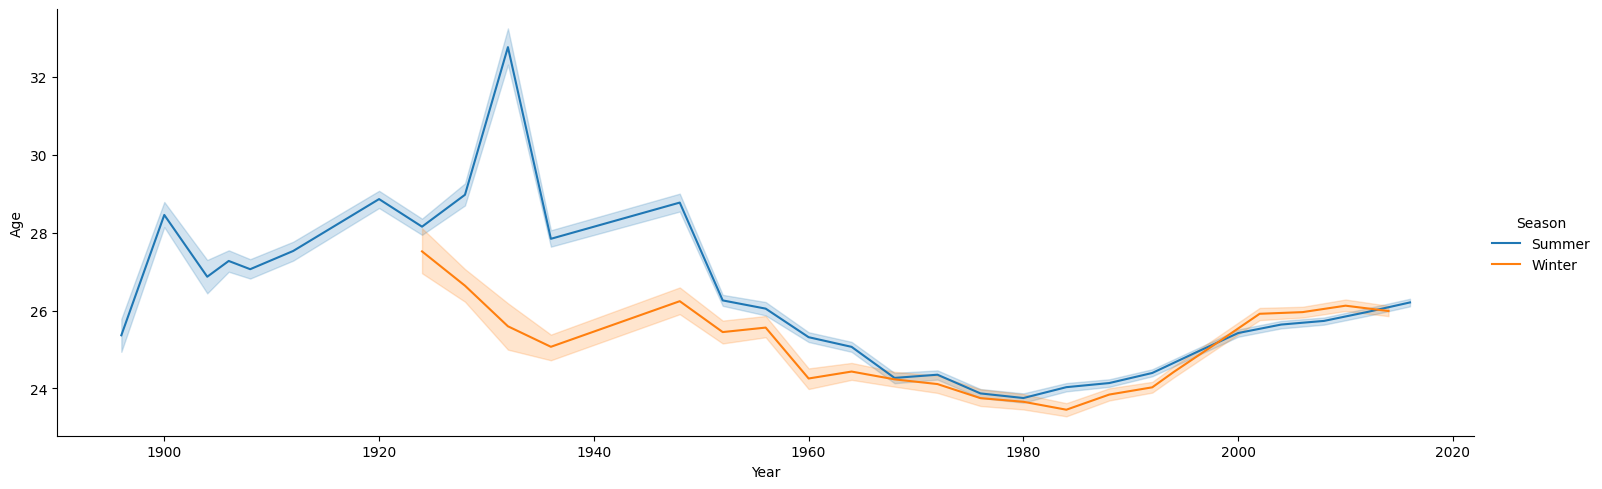

In [66]:
sns.relplot(data=olympics, x='Year', y='Age', kind='line', aspect=3, hue='Season')

### 32. Look at the distributions of `Age` for different `Sex` using boxplots

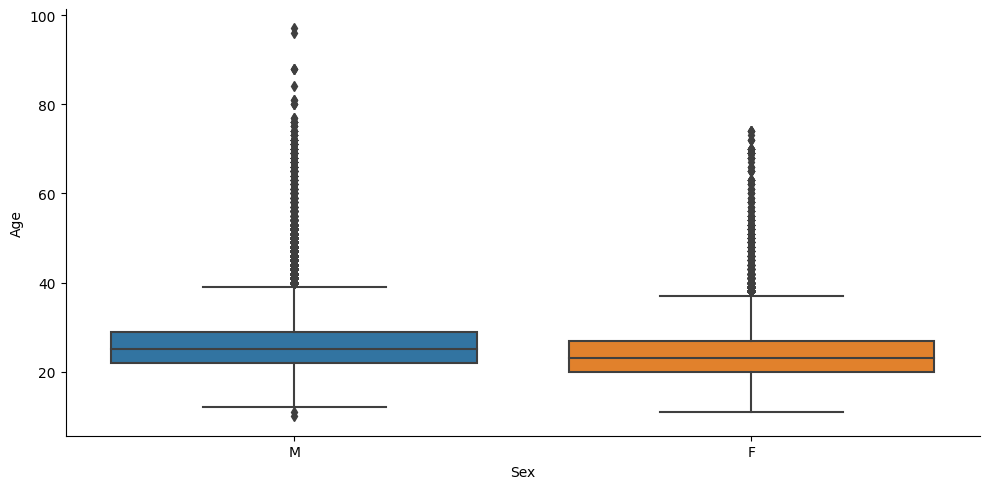

In [67]:
sns.catplot(data=olympics, x='Sex', y='Age', kind='box', aspect=2)

### 33. Look at the distributions of `Age` for different `Sex` using violin plots

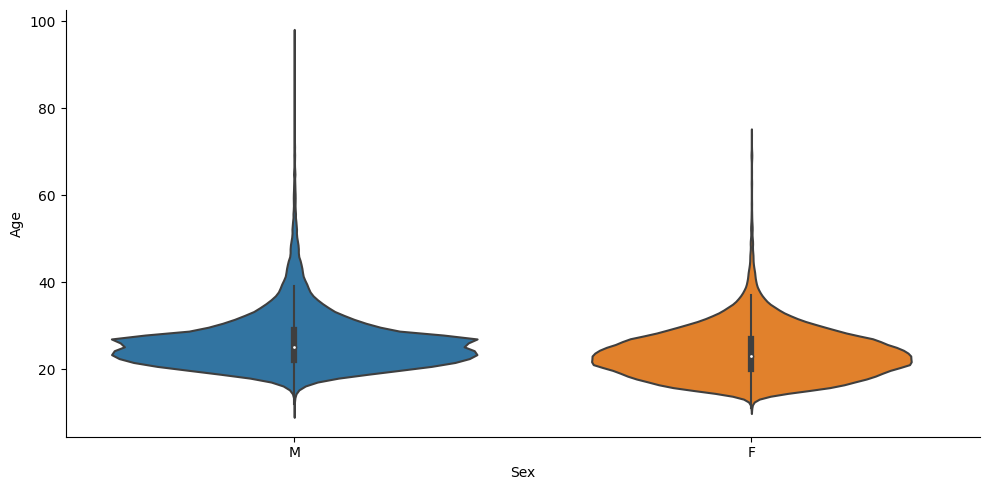

In [68]:
sns.catplot(data=olympics, x='Sex', y='Age', kind='violin', aspect=2)

### 34. Look at the distributions of `Age` for different `Sex` using boxplots, with different colors of plots for different `Season`

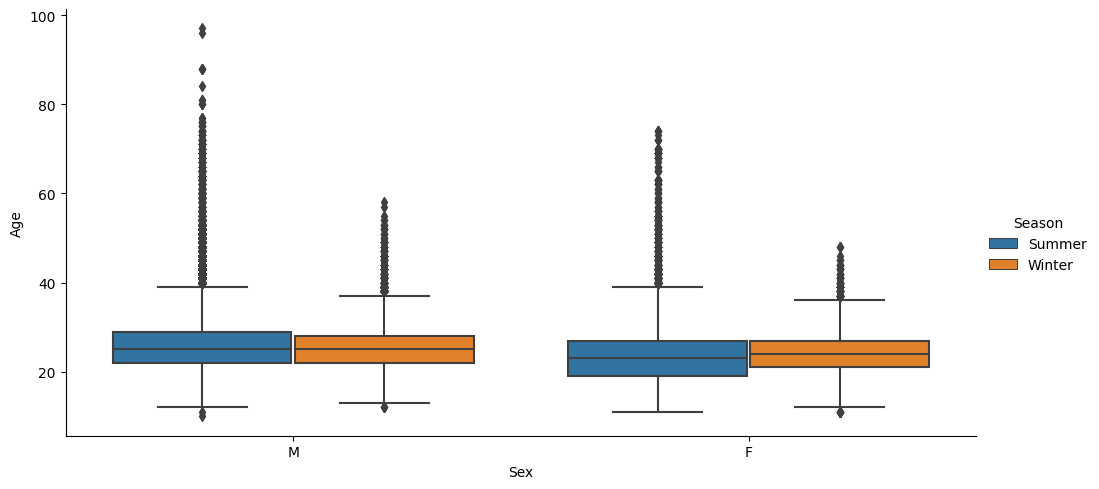

In [69]:
sns.catplot(data=olympics, x='Sex', y='Age', kind='box', aspect=2, hue='Season')

### 35. Use count plots to look at the changes of number of athlete-events across `Year`, for different `Sex` by colors, and different `Season` on separate plots

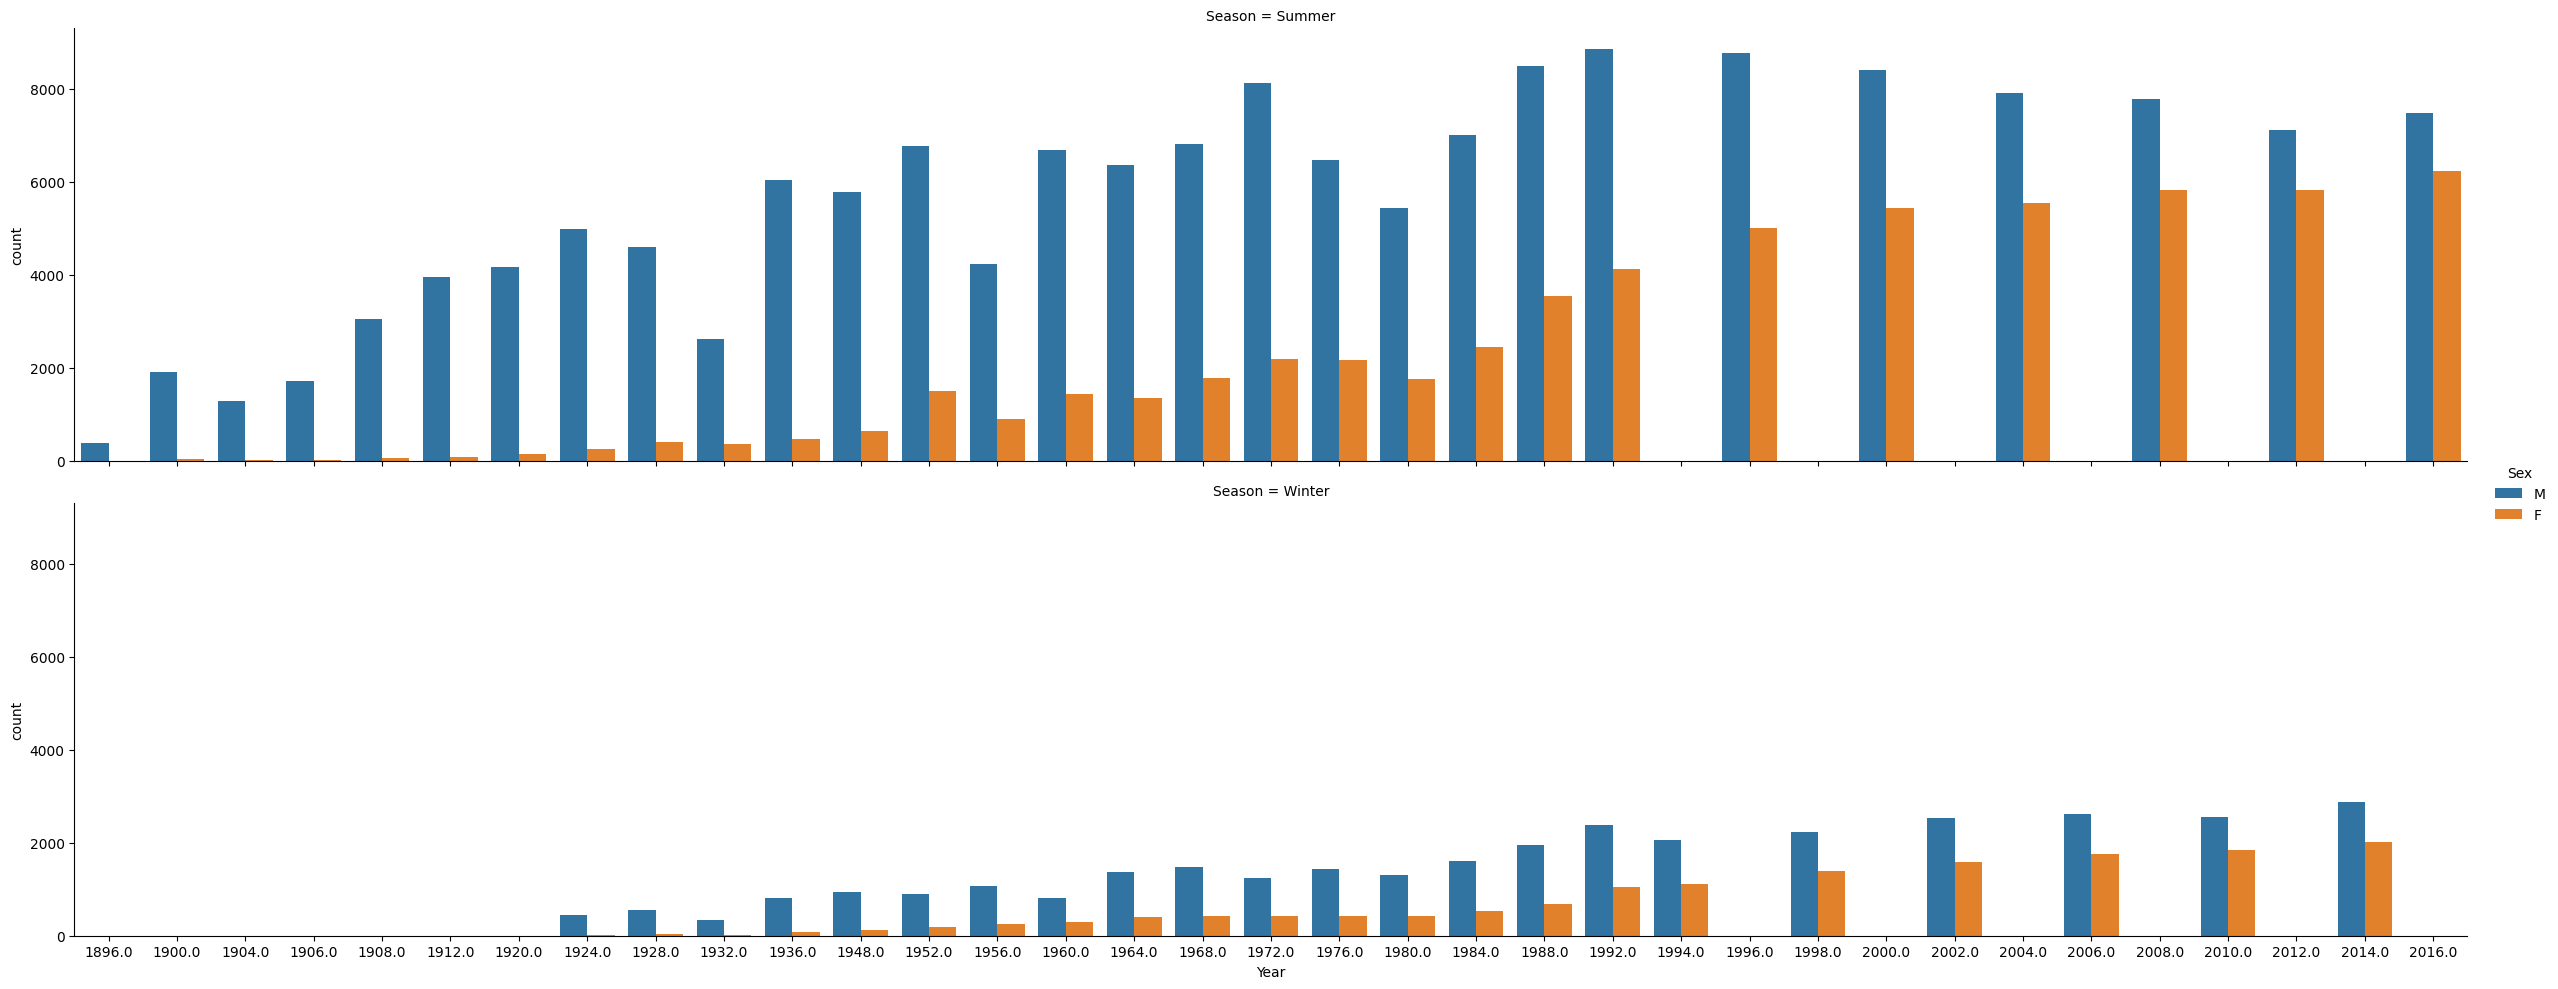

In [70]:
sns.catplot(data=olympics, x='Year', kind='count', hue='Sex',aspect=5,col='Season', col_wrap=1)

In [71]:
pip install notebook-as-pdf

DEPRECATION: Loading egg at /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/jupyter-1.0.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
Note: you may need to restart the kernel to use updated packages.


In [72]:
pip install nbconvert

DEPRECATION: Loading egg at /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/jupyter-1.0.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
Note: you may need to restart the kernel to use updated packages.


In [73]:
!pip install -U notebook-as-pdf
!pyppeteer-install

DEPRECATION: Loading egg at /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/jupyter-1.0.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
chromium is already installed.
